In [189]:
from connec_functions import execute_to_df, generate_sparql
import pandas as pd
import requests

In [190]:
# sdg-tool endpoint (source: https://github.com/osdg-ai/osdg-tool/tree/pre-release?tab=readme-ov-file)
osdgtool_url = 'http://osdg-tool:5000/tag'

sdg_dict = {'SDG_1': 'GOAL 1: No Poverty',
            'SDG_2': 'GOAL 2: Zero Hunger',
            'SDG_3': 'GOAL 3: Good Health and Well-being',
            'SDG_4': 'GOAL 4: Quality Education',
            'SDG_5': 'GOAL 5: Gender Equality',
            'SDG_6': 'GOAL 6: Clean Water and Sanitation',
            'SDG_7': 'GOAL 7: Affordable and Clean Energy',
            'SDG_8': 'GOAL 8: Decent Work and Economic Growth',
            'SDG_9': 'GOAL 9: Industry, Innovation and Infrastructure',
            'SDG_10': 'GOAL 10: Reduced Inequality',
            'SDG_11': 'GOAL 11: Sustainable Cities and Communities',
            'SDG_12': 'GOAL 12: Responsible Consumption and Production',
            'SDG_13': 'GOAL 13: Climate Action',
            'SDG_14': 'GOAL 14: Life Below Water',
            'SDG_15': 'GOAL 15: Life on Land',
            'SDG_16': 'GOAL 16: Peace and Justice Strong Institutions',
            'SDG_17': 'GOAL 17: Partnerships to achieve the Goal',
            'SDG_None': 'Publication not matched to any Goal'}

In [191]:
# publications in LW spcols with title and abstract info
pub_info_df = execute_to_df("3_publication_info.sparql")
pub_info_df

,publication,title,abstract
0,http://dev.marineinfo.org/id/publication/252061,"A first prototype for indexing, visualizing an...",Although biodiversity has been extensively stu...
1,http://dev.marineinfo.org/id/publication/330091,Landscape of EOSC-related infrastructures and ...,The Landscape Working Group (WG) of the EOSC E...
2,http://dev.marineinfo.org/id/publication/340376,The importance of home cleaning: sediment tran...,Bartholomea annulata is a facultative host of ...
3,http://dev.marineinfo.org/id/publication/135106,"MarBEF, databases, and the legacy of John Gray",Within the European Network of Excellence (NoE...
4,http://dev.marineinfo.org/id/publication/252961,Using scenarios to project the changing profit...,Over-exploitation and economic underperformanc...
...,...,...,...
3828,http://dev.marineinfo.org/id/publication/367432,Multi-ocean distribution of a brooding predato...,How far are species distributed on the abyssal...
3829,http://dev.marineinfo.org/id/publication/311297,Range expansion of two box jellyfish (Cnidaria...,We report range extensions of <i>Chiropsalmus ...
3830,http://dev.marineinfo.org/id/publication/318205,Militarized marine protected areas in overseas...,Under the UN Convention on Biological Diversit...
3831,http://dev.marineinfo.org/id/publication/283926,Reusable biodiversity informatics tools,NaN


In [192]:
# combine textual info
pub_info_df['text'] = pub_info_df['title'] + ' | ' + pub_info_df['abstract']

In [193]:
# initialize empty columns
pub_info_df['sdgs'] = {}
pub_info_df['result'] = {}

# for each publication, get SDGs associated with textual information 
for i in range(len(pub_info_df)):   
    try:
        data = {'text': pub_info_df.loc[i, "text"] , 'detailed': False}
        response = requests.post(osdgtool_url, json=data)
        result = response.json()
        if result['result']:
            pub_info_df.at[i,'sdgs'] = {item['sdg']: 1 for item in list(result['result'])}
            pub_info_df.at[i,'result'] = result['result']
        else:
            pub_info_df.at[i,'result'] = result['result']
            
    except:
        pass

In [194]:
pub_info_df

,publication,title,abstract,text,sdgs,result
0,http://dev.marineinfo.org/id/publication/252061,"A first prototype for indexing, visualizing an...",Although biodiversity has been extensively stu...,"A first prototype for indexing, visualizing an...","{'SDG_2': 1, 'SDG_3': 1, 'SDG_14': 1}","[{'sdg': 'SDG_2', 'relevance': 3.0}, {'sdg': '..."
1,http://dev.marineinfo.org/id/publication/330091,Landscape of EOSC-related infrastructures and ...,The Landscape Working Group (WG) of the EOSC E...,Landscape of EOSC-related infrastructures and ...,NaN,[]
2,http://dev.marineinfo.org/id/publication/340376,The importance of home cleaning: sediment tran...,Bartholomea annulata is a facultative host of ...,The importance of home cleaning: sediment tran...,"{'SDG_2': 1, 'SDG_14': 1, 'SDG_6': 1}","[{'sdg': 'SDG_2', 'relevance': 3.0}, {'sdg': '..."
3,http://dev.marineinfo.org/id/publication/135106,"MarBEF, databases, and the legacy of John Gray",Within the European Network of Excellence (NoE...,"MarBEF, databases, and the legacy of John Gray...","{'SDG_14': 1, 'SDG_2': 1, 'SDG_6': 1}","[{'sdg': 'SDG_14', 'relevance': 8.0}, {'sdg': ..."
4,http://dev.marineinfo.org/id/publication/252961,Using scenarios to project the changing profit...,Over-exploitation and economic underperformanc...,Using scenarios to project the changing profit...,"{'SDG_2': 1, 'SDG_3': 1, 'SDG_13': 1}","[{'sdg': 'SDG_2', 'relevance': 2.0}, {'sdg': '..."
...,...,...,...,...,...,...
3828,http://dev.marineinfo.org/id/publication/367432,Multi-ocean distribution of a brooding predato...,How far are species distributed on the abyssal...,Multi-ocean distribution of a brooding predato...,"{'SDG_14': 1, 'SDG_2': 1, 'SDG_3': 1}","[{'sdg': 'SDG_14', 'relevance': 5.0}, {'sdg': ..."
3829,http://dev.marineinfo.org/id/publication/311297,Range expansion of two box jellyfish (Cnidaria...,We report range extensions of <i>Chiropsalmus ...,Range expansion of two box jellyfish (Cnidaria...,NaN,[]
3830,http://dev.marineinfo.org/id/publication/318205,Militarized marine protected areas in overseas...,Under the UN Convention on Biological Diversit...,Militarized marine protected areas in overseas...,"{'SDG_15': 1, 'SDG_2': 1, 'SDG_11': 1}","[{'sdg': 'SDG_15', 'relevance': 5.0}, {'sdg': ..."
3831,http://dev.marineinfo.org/id/publication/283926,Reusable biodiversity informatics tools,NaN,NaN,NaN,NaN


In [195]:
pub_sdg = pub_info_df[['publication','sdgs']]
pub_sdg.set_index('publication', inplace=True)
pub_sdg = pub_sdg['sdgs'].apply(pd.Series)
pub_sdg.drop(0, axis=1, inplace=True)

In [196]:
sdg_pubcount = pub_sdg.count().reset_index().rename(columns={'index':'SDG', 0:'count'})
sdg_pubcount

,SDG,count
0,SDG_2,1245
1,SDG_3,1066
2,SDG_14,1627
3,SDG_6,301
4,SDG_13,330
5,SDG_15,752
6,SDG_16,109
7,SDG_12,54
8,SDG_1,17
9,SDG_7,139


In [197]:
sdg_pubcount['sdg_int'] = [int(word.split('_')[-1]) for word in sdg_pubcount['SDG']]
sdg_pubcount = sdg_pubcount.sort_values(by='sdg_int')

#### The number of publications linked to Sustainable Development Goals. 
(Goal 17: Partnerships to achieve the Goal’ is not included.)

In [198]:
# Table 
sdg_pubcount_ = sdg_pubcount.copy().drop('sdg_int', axis=1)
sdg_pubcount_['SDG'] = [ sdg_dict[sdg] for sdg in sdg_pubcount['SDG'] if sdg in sdg_dict.keys()]
sdg_pubcount_

,SDG,count
8,GOAL 1: No Poverty,17
0,GOAL 2: Zero Hunger,1245
1,GOAL 3: Good Health and Well-being,1066
13,GOAL 4: Quality Education,20
3,GOAL 6: Clean Water and Sanitation,301
9,GOAL 7: Affordable and Clean Energy,139
14,GOAL 8: Decent Work and Economic Growth,17
10,"GOAL 9: Industry, Innovation and Infrastructure",200
12,GOAL 10: Reduced Inequality,55
11,GOAL 11: Sustainable Cities and Communities,292


#### The numbers of LifeWatch publications linked to the different Sustainable Development Goals (1-16).

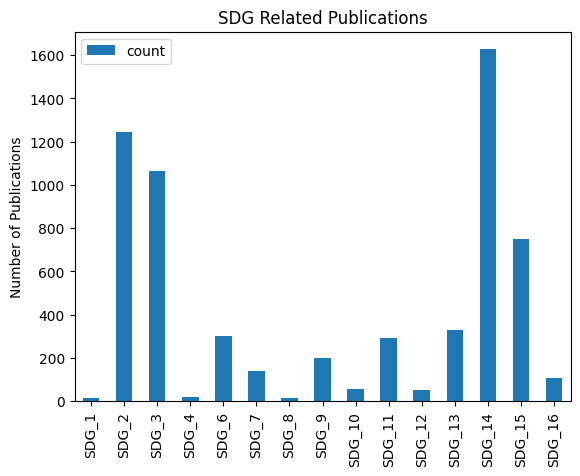

In [199]:
# Figure
ax = sdg_pubcount.plot.bar(x='SDG', y='count', rot=90, title='SDG Related Publications', ylabel= 'Number of Publications', xlabel='')